### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [41]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

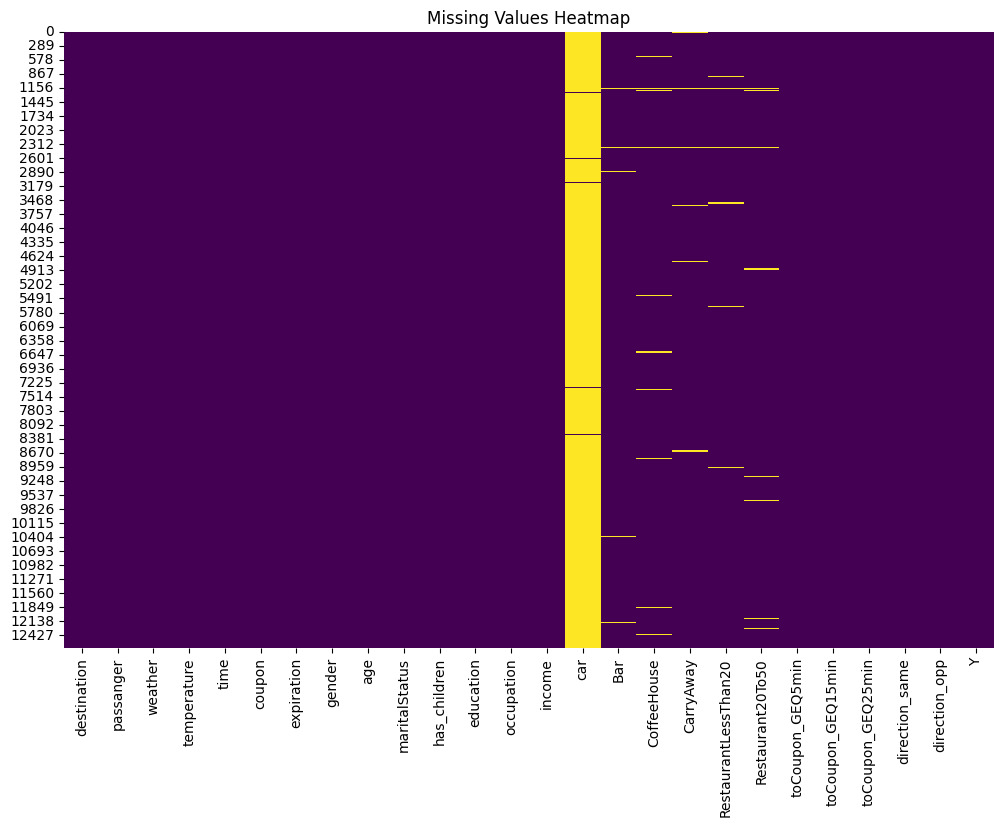

In [19]:
# Check rows and columns via shape
data.shape #(12684, 26)
# Check data types and non-null counts via info
data.info() #Checking to see if columns are numeric, categorical, or datetime. Also checking for null values or non-null counts.

#Lets count missing values for each columns (26 in total)
missing_counts = data.isnull().sum()
print(missing_counts)
###################################
# Following columns have missing values:
#car                     12576
#Bar                       107
#CoffeeHouse               217
#CarryAway                 151
#RestaurantLessThan20      130
#Restaurant20To50          189
###################################

#let's find out the percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)
#####################
# Missing values in % 
#car                     99.148534
#Bar                      0.843582
#CoffeeHouse              1.710817
#CarryAway                1.190476
#RestaurantLessThan20     1.024913
#Restaurant20To50         1.490066
#####################

# Let us try to visualize the mssing values using seaborn
# Visualizing missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


                      Missing Count  Missing %
car                           12576  99.148534
CoffeeHouse                     217   1.710817
Restaurant20To50                189   1.490066
CarryAway                       151   1.190476
RestaurantLessThan20            130   1.024913
Bar                             107   0.843582
weather                           0   0.000000
temperature                       0   0.000000
destination                       0   0.000000
passanger                         0   0.000000
maritalStatus                     0   0.000000
age                               0   0.000000
gender                            0   0.000000
expiration                        0   0.000000
coupon                            0   0.000000
time                              0   0.000000
income                            0   0.000000
occupation                        0   0.000000
has_children                      0   0.000000
education                         0   0.000000
toCoupon_GEQ5

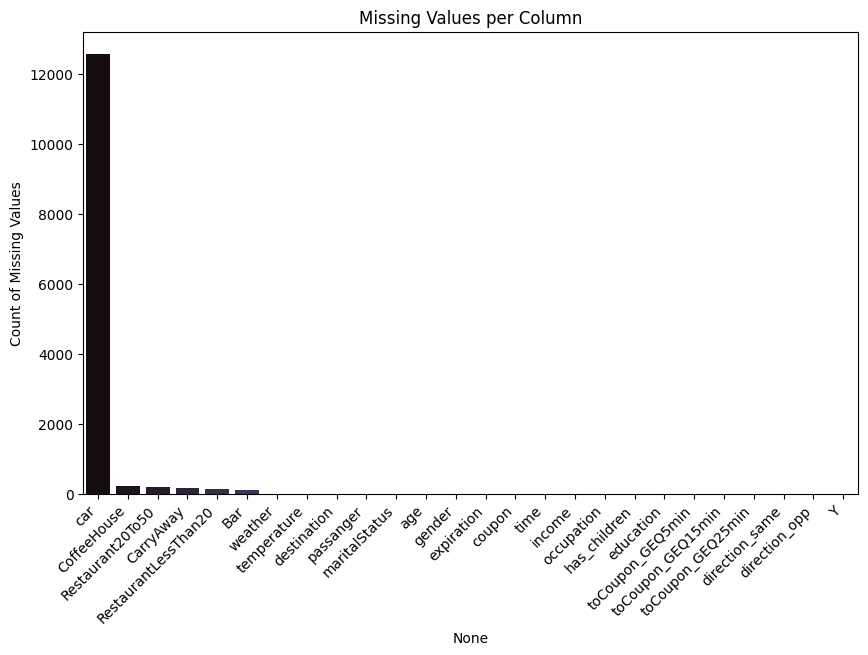

In [ ]:
# Combining into a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percentage
}).sort_values(by='Missing Count', ascending=False)

# % helps to understand the proportion of missing data in each column. Hence find missing counts and percentages both!
# A column with 50 missing values may be trivial in a dataset of 100,000 rows but critical in a dataset of 200 rows. :-)


print(missing_summary)

# Heatmap with annotations
# plt.figure(figsize=(12,6))
# sns.heatmap(data.isnull(),cbar=False, cmap='viridis')
# plt.title("Missing Data Heatmap (Row-wise)")
# plt.show()

# Bar plot of missing values per column
plt.figure(figsize=(10,6))
#sns.barplot(x=missing_summary.index, y=missing_summary['Missing Count'], palette="mako")
#Warning received - Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
sns.barplot(x=missing_summary.index, y=missing_summary['Missing Count'], hue=missing_summary.index, palette="mako", legend=False)
plt.xticks(rotation=45, ha='right')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()


74
['never' 'less1' '4~8' '1~3' 'gt8' nan]
        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
mi

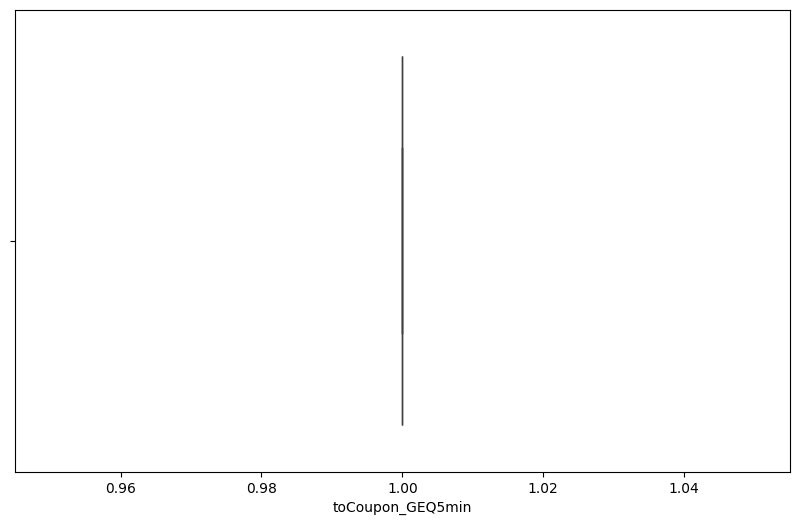

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


In [30]:
# Checking for problematic data entries
print(data.duplicated().sum()) # 74 Rows are duplicated
# Checking for unexpected categories in categorical columns
print(data['CoffeeHouse'].unique())
# Basic statistical summary for numeric columns
print(data.describe())
# Visualize outliers in numeric columns using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(x=data['toCoupon_GEQ5min'])
plt.show()

# Invalid Values Search - Response should only be 0 or 1
print(data['Restaurant20To50'].value_counts())

3. Decide what to do about your missing data -- drop, replace, other...

In [50]:

# Drop rows with any missing values
data_cleaned = data.dropna()
print(f"Data shape after dropping rows with missing values: {data_cleaned.shape}")
#data_cleaned.info()
#data_cleaned
#data.columns
##################################################
#car                     99.148534
#Bar                      0.843582
#CoffeeHouse              1.710817
#CarryAway                1.190476
#RestaurantLessThan20     1.024913
#Restaurant20To50         1.490066
###################################################
# -------------------------------
# 1. Handle Missing Values
# -------------------------------

# Drop 'car' column (too much missing ~99%)
if('car' in data.columns):
    data = data.drop(columns=['car'])

# Impute categorical columns with mode
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].mode()[0])

# -------------------------------
# 2. Fix Categories
# -------------------------------

# Standardize string columns
categorical_cols = ['destination','passanger','weather','time','coupon',
                    'expiration','gender','maritalStatus','education','occupation','income']

for col in categorical_cols:
    data[col] = data[col].astype(str).str.lower().str.strip()

# -------------------------------
# 3. Remove Duplicates
# -------------------------------

data.drop_duplicates(inplace=True)

# -------------------------------
# 4. Outlier Treatment
# -------------------------------

# Example: cap age at 1st and 99th percentile
# q_low = data['age'].quantile(0.01)
# q_high = data['age'].quantile(0.99)
# data['age'] = np.clip(data['age'], q_low, q_high)

# Example: log-transform income if numeric
if pd.api.types.is_numeric_dtype(data['income']):
    data['income'] = np.log1p(data['income'])
# age is coming back as string
#print(data['age'].dtype) #coming back as object which means it is a string
#print(data['age'].head())
#converting age from string to numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')
# Now check again to see if we successfully converted the column to numeric
#print(data['age'].dtype) # coming back as float64 so we were able to convert the colunn to numeric
print(f"Total NaN values in age column now - ",data['age'].isnull().sum())
#Filling missing ages with median age
data['age'] = data['age'].fillna(data['age'].median())
print(data['age'].quantile(0.01), data['age'].quantile(0.99))
# -------------------------------
# 5. Final Check
# -------------------------------

print("Remaining missing values:\n", data.isnull().sum())
print("Data shape after cleaning:", data.shape)

Data shape after dropping rows with missing values: (10285, 25)
Total NaN values in age column now -  2325
21.0 46.0
Remaining missing values:
 destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
Data shape after cleaning: (12610, 25)


In [53]:
#Generating a diagnostic script to see which columns are numeric vs object and plus flag any potential conversion issues.
# Reload our dataset
#data = pd.read_csv("data/coupons.csv")

# 1. Column types overview
print("\n--- Column Data Types ---")
#print(data.dtypes)

# 2. Identify numeric vs. non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
object_cols = data.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Object (string/categorical) columns:", object_cols)
#Numeric columns: ['temperature', 'age', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']
#Object (string/categorical) columns: ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


# 3. Checking for non-numeric values in supposed numeric columns
for col in ['age', 'income']:  # We can reuse this loop to add other numeric-like columns if needed.
    if col in data.columns:
        bad_values = data[pd.to_numeric(data[col], errors='coerce').isna()][col].unique()
        if len(bad_values) > 0:
            print(f"\nColumn '{col}' has non-numeric values:", bad_values)

# 4. Summary of missing values
print("\n--- Missing Values Summary ---")
print(data.isnull().sum())


--- Column Data Types ---

Numeric columns: ['temperature', 'age', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']
Object (string/categorical) columns: ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

Column 'income' has non-numeric values: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or more' '$87500 - $99999'
 'less than $12500']

--- Missing Values Summary ---
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation

4. What proportion of the total observations chose to accept the coupon?



In [57]:
# Proportion of accepted coupons
acceptance_rate = data['Y'].mean()

print(f"Proportion of accepted coupons: {acceptance_rate:.2%}") #- Taking the mean of a binary column gives the proportion of 1s (accepted). Displayign the value as %

# Let's try to visualize the break down where coupon was accepted vs not accepted
# We need to ensure Y column is numeric
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

# Group by coupon type and calculate acceptance rate
acceptance_by_coupon = data.groupby('coupon')['Y'].mean().reset_index()
acceptance_by_coupon.rename(columns={'Y': 'acceptance_rate'}, inplace=True)

print(acceptance_by_coupon)



Proportion of accepted coupons: 56.76%
                  coupon  acceptance_rate
0                    bar         0.409950
1  carry out & take away         0.733788
2           coffee house         0.498621
3      restaurant(20-50)         0.441532
4        restaurant(<20)         0.707809


5. Use a bar plot to visualize the `coupon` column.

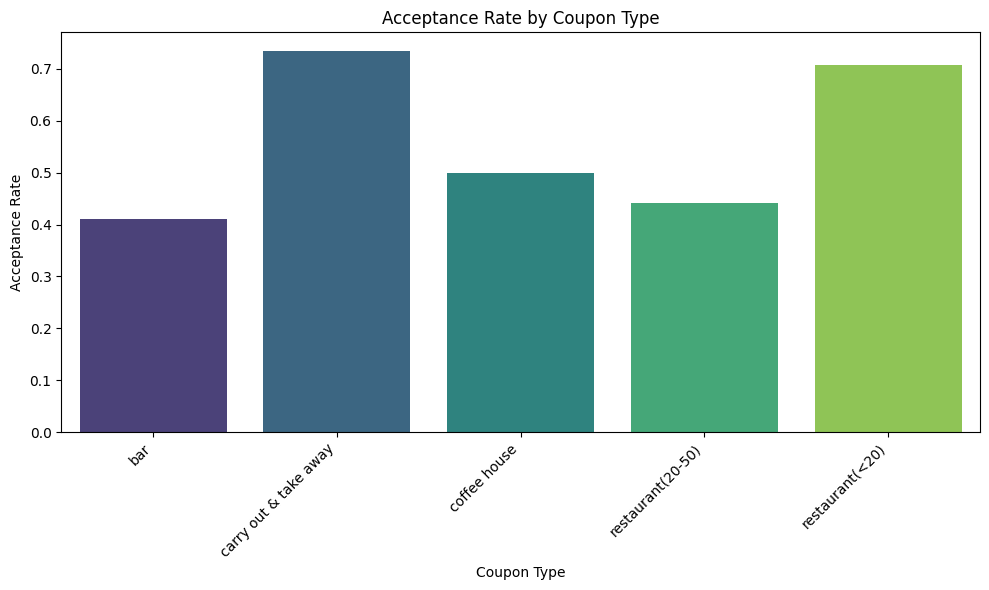

In [58]:
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(data=acceptance_by_coupon, x='coupon', y='acceptance_rate', hue='coupon', palette='viridis')
plt.title("Acceptance Rate by Coupon Type")
plt.ylabel("Acceptance Rate")
plt.xlabel("Coupon Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

63.26724821570183
80.0
0
(12610,)
int64
count    12610.000000
mean        63.267248
std         19.153386
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64


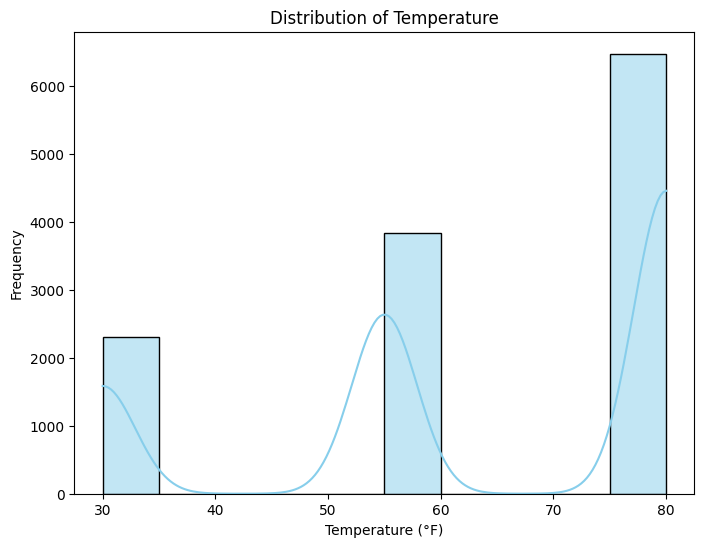

In [ ]:
# Should we ensure temperature is numeric?? Lets run the diagnostics...
#data['temperature'] = pd.to_numeric(data['temperature'], errors='coerce')
print(data['temperature'].mean())
print(data['temperature'].median()) 
print(data['temperature'].isnull().sum())
print(data['temperature'].shape)
print(data['temperature'].dtype)
print(data['temperature'].describe()) #50% is the median usually
# Drop missing values for plotting
#temp_data = data['temperature'].dropna()

# Histogram
plt.figure(figsize=(8,6))
#sns.histplot(temp_data, bins=10, kde=True, color='skyblue')
sns.histplot(data['temperature'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [84]:
# Filtering all rows where coupon type is 'Bar'
bar_coupons = data[data['coupon'].str.lower().str.strip() == 'bar']

# Inspect the new DataFrame
print(bar_coupons.shape)
#print(bar_coupons.head())

#Investigate the bar coupons further if any data related to NaN or similar manipulation is needed
print(f"Mode for bar_coupons: \n{bar_coupons.mode()}")

(2010, 25)
Mode for bar_coupons: 
       destination passanger weather  temperature time coupon expiration  \
0  no urgent place     alone   sunny           55  6pm    bar         1d   

   gender   age    maritalStatus  ...  CoffeeHouse CarryAway  \
0  female  26.0  married partner  ...        less1       1~3   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
0                  1~3            less1                1                 1   

  toCoupon_GEQ25min direction_same direction_opp  Y  
0                 0              0             1  0  

[1 rows x 25 columns]


In [85]:
print(f"Missing values in bar_coupons:\n{bar_coupons.isnull().sum()}")

Missing values in bar_coupons:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [86]:
print(f"Data type of bar_coupons: \n{bar_coupons.dtypes}")

Data type of bar_coupons: 
destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                     float64
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
dtype: object


In [87]:
print(f"Description of bar_coupons: \n{bar_coupons.describe()}") #50% is the median usually

Description of bar_coupons: 
       temperature          age  has_children  toCoupon_GEQ5min  \
count  2010.000000  2010.000000   2010.000000            2010.0   
mean     57.599502    29.211443      0.433333               1.0   
std      17.946364     7.091984      0.495659               0.0   
min      30.000000    21.000000      0.000000               1.0   
25%      55.000000    26.000000      0.000000               1.0   
50%      55.000000    26.000000      0.000000               1.0   
75%      80.000000    31.000000      1.000000               1.0   
max      80.000000    46.000000      1.000000               1.0   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
count        2010.000000        2010.000000     2010.000000    2010.000000   
mean            0.663184           0.253731        0.208955       0.791045   
std             0.472739           0.435254        0.406664       0.406664   
min             0.000000           0.000000        0.00

2. What proportion of bar coupons were accepted?


In [90]:
#bar_coupons.info()
#Finding what proportion of bar_coupons were accepted
accepted_rate_bar = bar_coupons['Y'].mean()
print(f"Proportion of accepted bar coupons: {accepted_rate_bar:.2%}")

Proportion of accepted bar coupons: 41.00%


  age_group         Y
0       <20       NaN
1     20-29  0.443316
2     30-39  0.343119
3     40-49  0.399293
4     50-59       NaN
5       60+       NaN


C:\Users\Bhatnagar\AppData\Local\Temp\ipykernel_33636\1473377075.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_acceptance = bar_age_coupons.groupby('age_group')['Y'].mean().reset_index()
C:\Users\Bhatnagar\AppData\Local\Temp\ipykernel_33636\1473377075.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_acceptance, x='age_group', y='Y', palette='mako')


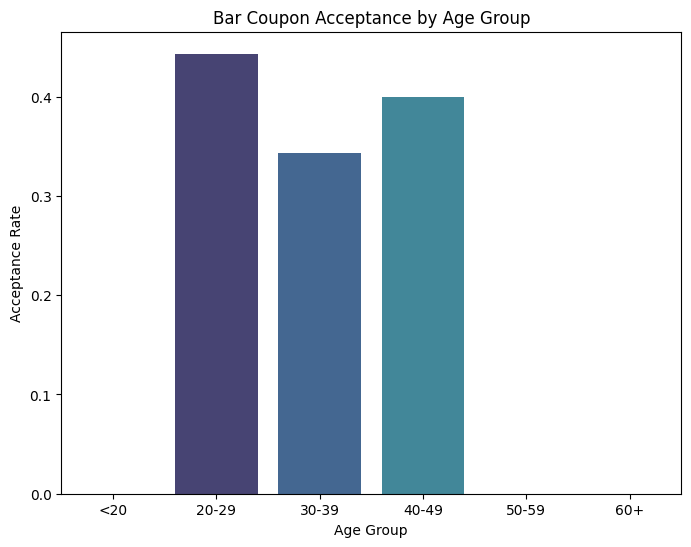

       maritalStatus         Y
0           divorced  0.240000
1    married partner  0.328000
2             single  0.546142
3  unmarried partner  0.399471
4            widowed  0.333333


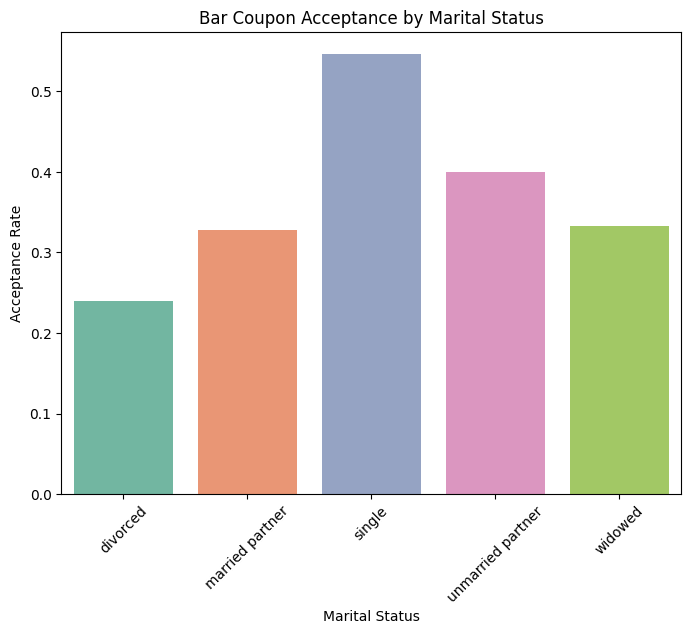

In [93]:
# --- Acceptance by Age Group ---
bar_age_coupons = bar_coupons.copy()
# Create age bins
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
bar_age_coupons['age_group'] = pd.cut(pd.to_numeric(bar_age_coupons['age'], errors='coerce'), bins=bins, labels=labels)
# Calculate acceptance rate by age group
age_acceptance = bar_age_coupons.groupby('age_group')['Y'].mean().reset_index()
print(age_acceptance)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=age_acceptance, x='age_group', y='Y', palette='mako')
plt.title("Bar Coupon Acceptance by Age Group")
plt.ylabel("Acceptance Rate")
plt.xlabel("Age Group")
plt.show()

# --- Acceptance by Marital Status ---
marital_acceptance = bar_age_coupons.groupby('maritalStatus')['Y'].mean().reset_index()
print(marital_acceptance)

# Plot
plt.figure(figsize=(8,6))
#sns.barplot(data=marital_acceptance, x='maritalStatus', y='Y', palette='Set2')
#Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.
sns.barplot(data=marital_acceptance, x='maritalStatus', y='Y', hue='maritalStatus', palette='Set2', legend=False)
plt.title("Bar Coupon Acceptance by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xlabel("Marital Status")
plt.xticks(rotation=45)
plt.show()

             income         Y
0   $100000 or more  0.475694
1   $12500 - $24999  0.416667
2   $25000 - $37499  0.449686
3   $37500 - $49999  0.348315
4   $50000 - $62499  0.412214
5   $62500 - $74999  0.353846
6   $75000 - $87499  0.377483
7   $87500 - $99999  0.312057
8  less than $12500  0.460606


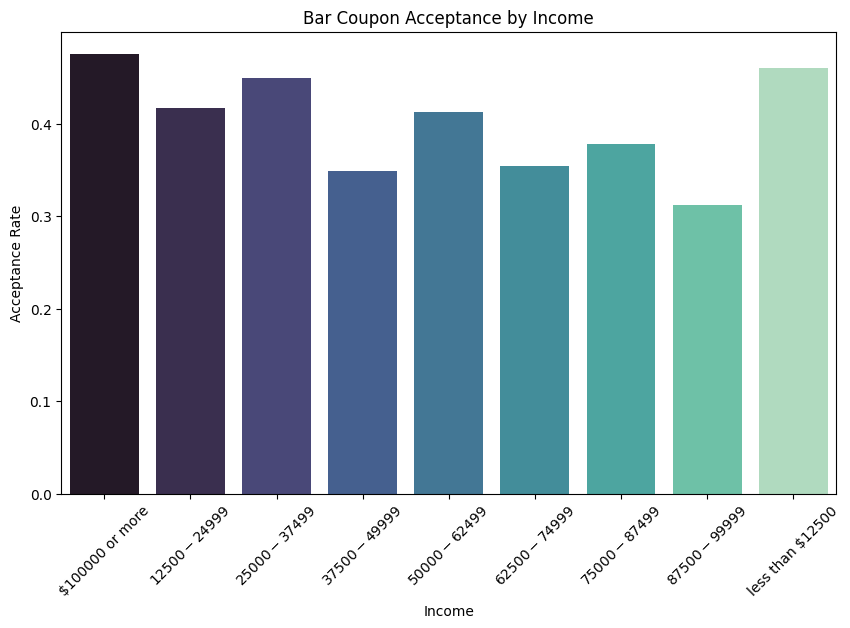

                                   occupation         Y
0                  architecture & engineering  0.666667
1    arts design entertainment sports & media  0.330000
2   building & grounds cleaning & maintenance  0.285714
3                        business & financial  0.460674
4                 community & social services  0.295455
5                     computer & mathematical  0.375546
6                   construction & extraction  0.541667
7                  education&training&library  0.285714
8                  farming fishing & forestry  0.444444
9          food preparation & serving related  0.479167
10       healthcare practitioners & technical  0.439024
11                         healthcare support  0.659091
12          installation maintenance & repair  0.444444
13                                      legal  0.352941
14               life physical social science  0.625000
15                                 management  0.547826
16            office & administrative support  0

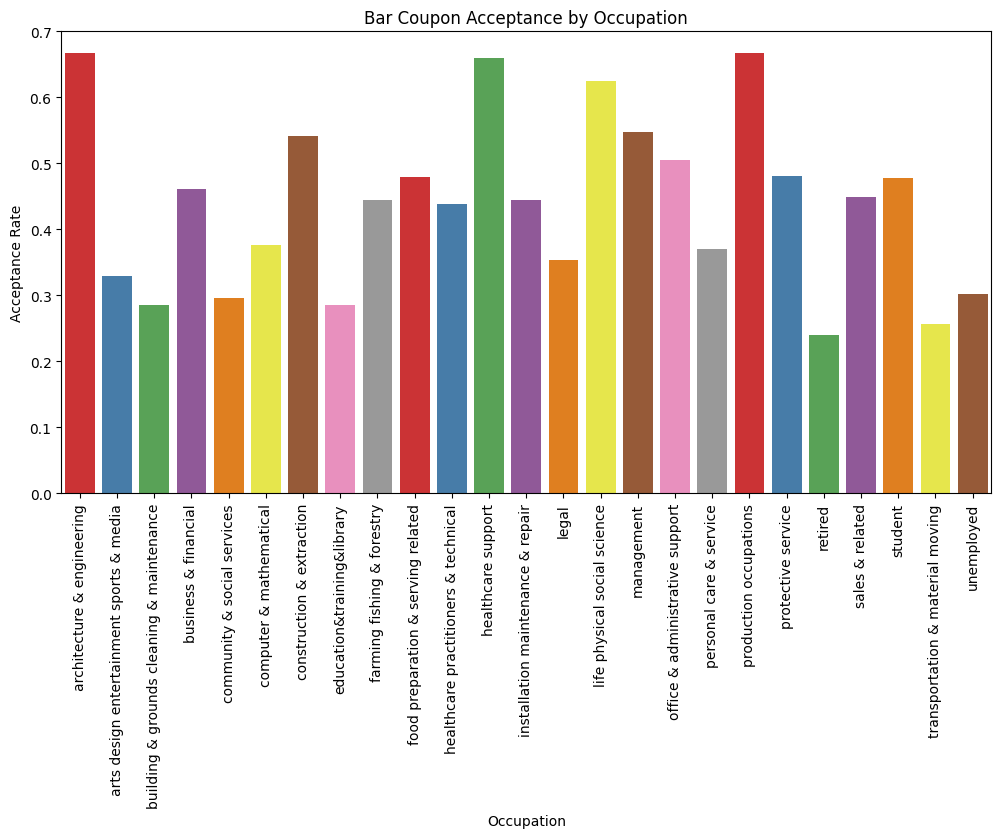

In [94]:
#Extending the bar coupon analysis to income and occupation
# --- Acceptance by Income ---
income_acceptance = bar_coupons.groupby('income')['Y'].mean().reset_index()
print(income_acceptance)

plt.figure(figsize=(10,6))
sns.barplot(data=income_acceptance, x='income', y='Y', hue='income', palette='mako', legend=False)
plt.title("Bar Coupon Acceptance by Income")
plt.ylabel("Acceptance Rate")
plt.xlabel("Income")
plt.xticks(rotation=45)
plt.show()

# --- Acceptance by Occupation ---
occupation_acceptance = bar_coupons.groupby('occupation')['Y'].mean().reset_index()
print(occupation_acceptance)

plt.figure(figsize=(12,6))
sns.barplot(data=occupation_acceptance, x='occupation', y='Y', hue='occupation', palette='Set1', legend=False)
plt.title("Bar Coupon Acceptance by Occupation")
plt.ylabel("Acceptance Rate")
plt.xlabel("Occupation")
plt.xticks(rotation=90)
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

C:\Users\Bhatnagar\AppData\Local\Temp\ipykernel_33636\2387134504.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_acceptance = bar_age_coupons.groupby(['age_group', 'maritalStatus', 'income', 'occupation'])['Y'].mean().reset_index()


   age_group maritalStatus           income  \
0        <20      divorced  $100000 or more   
1        <20      divorced  $100000 or more   
2        <20      divorced  $100000 or more   
3        <20      divorced  $100000 or more   
4        <20      divorced  $100000 or more   
5        <20      divorced  $100000 or more   
6        <20      divorced  $100000 or more   
7        <20      divorced  $100000 or more   
8        <20      divorced  $100000 or more   
9        <20      divorced  $100000 or more   
10       <20      divorced  $100000 or more   
11       <20      divorced  $100000 or more   
12       <20      divorced  $100000 or more   
13       <20      divorced  $100000 or more   
14       <20      divorced  $100000 or more   
15       <20      divorced  $100000 or more   
16       <20      divorced  $100000 or more   
17       <20      divorced  $100000 or more   
18       <20      divorced  $100000 or more   
19       <20      divorced  $100000 or more   

            

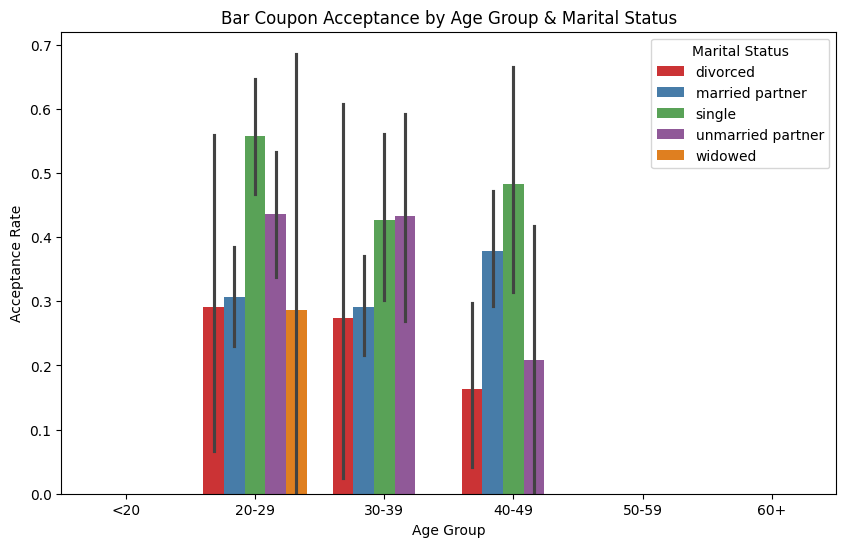

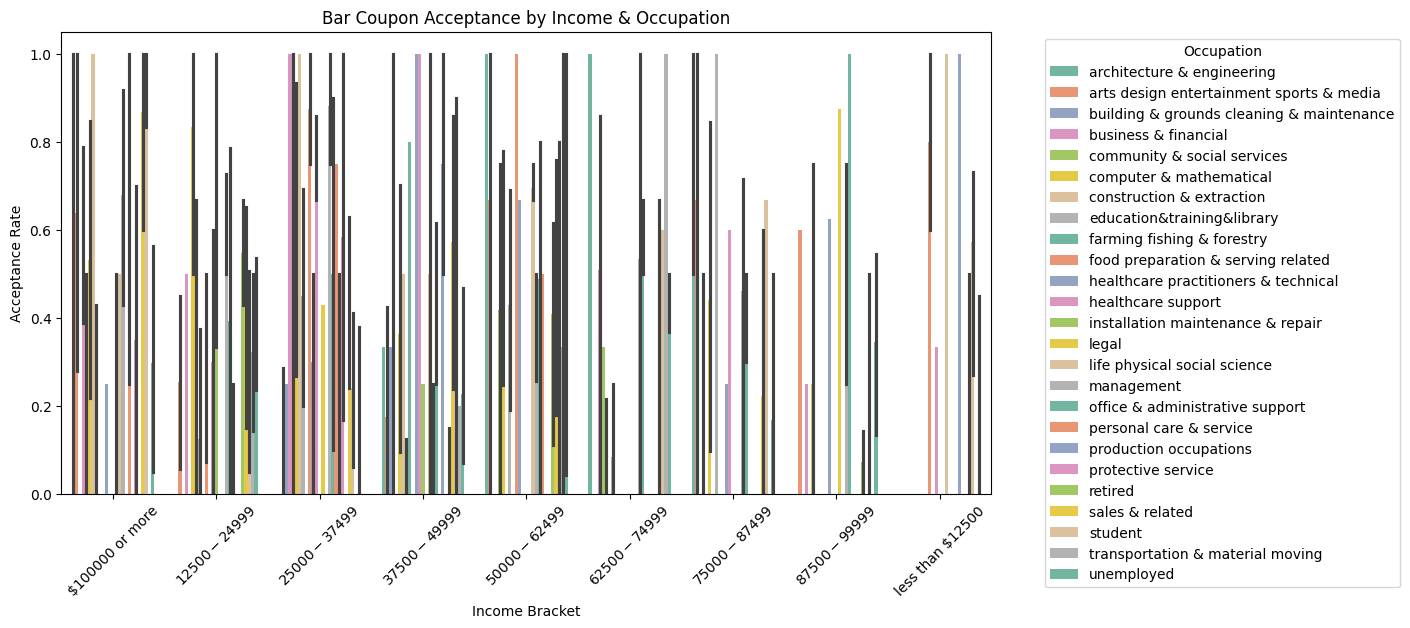

In [96]:
# Trying multi dimensional analysis on bar coupons
bar_age_coupons = bar_coupons.copy()
# --- Create Age Groups ---
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
bar_age_coupons['age_group'] = pd.cut(pd.to_numeric(bar_age_coupons['age'], errors='coerce'),bins=bins, labels=labels)
# --- Multi-dimensional acceptance ---
multi_acceptance = bar_age_coupons.groupby(['age_group', 'maritalStatus', 'income', 'occupation'])['Y'].mean().reset_index()

print(multi_acceptance.head(20))  # preview first 20 rows

# Multi dimensional visualization: acceptance by age group and marital status
plt.figure(figsize=(10,6))
sns.barplot(data=multi_acceptance, x='age_group', y='Y', hue='maritalStatus', palette='Set1')
plt.title("Bar Coupon Acceptance by Age Group & Marital Status")
plt.ylabel("Acceptance Rate")
plt.xlabel("Age Group")
plt.legend(title="Marital Status")
plt.show()

# Multi dimensional visualization: acceptance by income and occupation
plt.figure(figsize=(12,6))
sns.barplot(data=multi_acceptance, x='income', y='Y', hue='occupation', palette='Set2')
plt.title("Bar Coupon Acceptance by Income & Occupation")
plt.ylabel("Acceptance Rate")
plt.xlabel("Income Bracket")
plt.xticks(rotation=45)
plt.legend(title="Occupation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()